# Stellar Density Profile of Galaxy Groups

### The plots created below look at the way that the stellar density profiles of galaxies change over multiple snapshots. The stellar density profile is plotted against the radius of the galaxy, to see how the amount of stars in a galaxy changes as you move further away from the center of the galaxy. This line is plotted at five different snapshots to see if there are any fluctuations that would indicate tidal stripping. I decided to compare the graphs of the first four galaxies in each group. In the TNG files, the galaxies are ordered by mass. This makes it easy to indicate the central galaxy in the group and the most massive satellites in the group. 

### By looking at the stellar density profiles of the central and satellites, we can see if there are any specific snapshots where there may be in an increase in the centrals radius or density and a decrease in the satellites radius or density. This could mean that tidal stripping is occuring and we can look into this further. 

In [1]:
#Grabbing basic imports
import numpy as np 
import matplotlib.pyplot as plt
import h5py
import sys

## Plotting the stellar densities for the central and satellite galaxies of group 0

In [2]:
#Finding location of 5 different snapshots
tng_file_99 = '/Users/sofia/Research/Data/TNG100/lr_tng100/galaxies_progmaps_lr_tng100_099.hdf5' 
tng_file_72 = '/Users/sofia/Research/Data/TNG100/lr_tng100/galaxies_progmaps_lr_tng100_072.hdf5'
tng_file_59 = '/Users/sofia/Research/Data/TNG100/lr_tng100/galaxies_progmaps_lr_tng100_059.hdf5'
tng_file_40 = '/Users/sofia/Research/Data/TNG100/lr_tng100/galaxies_progmaps_lr_tng100_040.hdf5'
tng_file_33 = '/Users/sofia/Research/Data/TNG100/lr_tng100/galaxies_progmaps_lr_tng100_033.hdf5'

## Grabbing all the information needed from the TNG files to create the graphs I want to produce

### Data Sets used for this figure: 
### profile_star_rho_3d: Stellar density profile
### profile_bins: The outer edges of the profile bins in kpc
### scalar_star_mass: Total stellar mass

In [3]:
#creating a list containing the information needed from every snapshot
files = [tng_file_99, tng_file_72, tng_file_59, tng_file_40, tng_file_33]
#files = [tng_file_99, tng_file_84, tng_file_72, tng_file_67, tng_file_59, tng_file_50, tng_file_40, tng_file_33]

#to pull different information from the files for multiple galaxies at different snapshots, 
#we need to create dictionaries for each feild we want information from
profile_star_dict = dict() #dictionary for
profile_bins_dict = dict()
z_dict = dict()
stellar_mass_dict = dict() #dictionary for 

galaxies = 371 #number of galaxies we want to make graphs for

z = list() #list to store redshift values

#collect redshift values
for file in files:
    with h5py.File(file,'r') as f:
        z.append(f['config'].attrs['snap_z'])

#adding all information needed into the dictionaries created
for galaxy in range(0,galaxies):
   # gal_grp_1 = galaxy + 12
    profile_star = list() #making lists to store all the values for each galaxy
    profile_bins = list() #at each snapshot. These will be put into the dictionaries
    stellar_mass = list()
    for file in files:
        with h5py.File(file,'r') as f:
            profile_star.append(np.log10(np.array(f['profile_star_rho_3d'][galaxy])))
            profile_bins.append(np.array(f['profile_bins'][galaxy]))
            stellar_mass.append(np.array(f['scalar_star_mass'][galaxy]))
            #opening each snapshot file, grabbing the field and galaxy we want, and then
            #adding it to the lists made earlier. This will loop through ever snapshot
            #and then loop through every galaxy we want.
            
    #append to dictionary
    profile_star_dict[galaxy] = profile_star #storing every snapshot, for every galaxy 
    profile_bins_dict[galaxy] = profile_bins #into each dictionary
    z_dict[galaxy] = z
    #stellar_mass[galaxy] = stellar_mass

dict_list = [profile_star_dict, profile_bins_dict] 
#print(profile_bins_dict) 

/var/folders/rg/zd77grwn0v1b7vvj3kl1g43c0000gr/T/ipykernel_66974/119605820.py:29: RuntimeWarning: divide by zero encountered in log10
  profile_star.append(np.log10(np.array(f['profile_star_rho_3d'][galaxy])))


In [1]:
# creating group data structure 

group_dict = dict()


with h5py.File(tng_file_99,'r') as f:
        galaxy_grp = np.array(f['catgrp_id'])
        
#print(galaxy_grp)

for galaxy, group in enumerate(galaxy_grp):
    group_dict.setdefault(group,[])
    group_dict[group].append(galaxy)

# print(group_dict)     

NameError: name 'h5py' is not defined

In [5]:
def find_val_in_dict(target, dictionary):
    dict_val= list(dictionary.values())
    dict_keys = list(dictionary.keys())
    for n, l in enumerate(dict_val):
        if target in l:
            return dict_keys[n]
    return -1

## Creating the figure

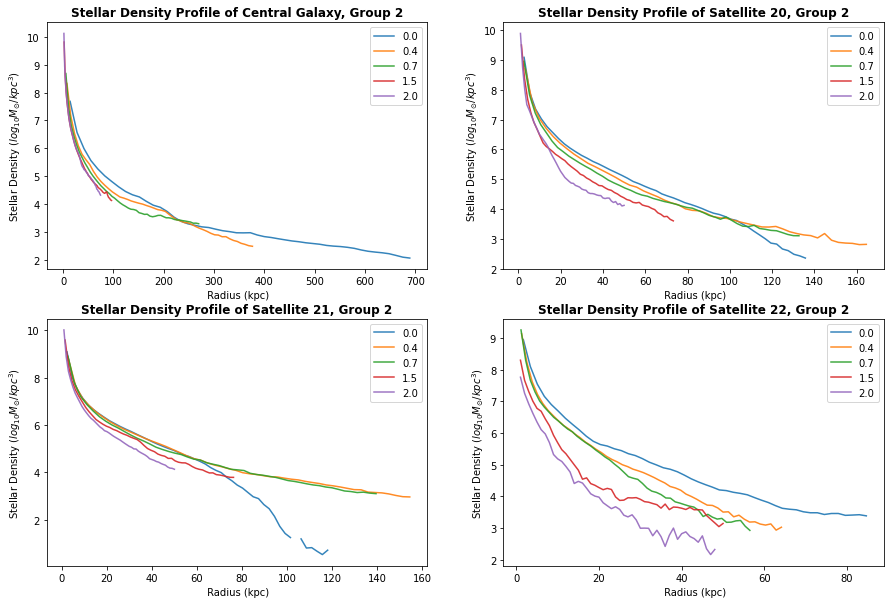

In [6]:
first_galaxy = True #used later to specify which graph is for the central galaxy 

x,y = 2,2

figure, axis = plt.subplots(x,y, figsize = (15, 10))
count = 1
for galaxy in range(19,23):
    group = find_val_in_dict(galaxy, group_dict)
    #creating axis titles and subplots
    plt.xlabel(r' Radius (kpc)')
    plt.ylabel(r'Stellar Density $(log_{10}M_{\odot}/kpc^{3})$')
    plt.subplot(x,y,(count))
    count+=1
    for snapshot in range(0,5):
        
        #making the subplots by grabbing the profile bins and stellar density profile for ever galaxy
        #at every snapshot
        plt.plot(profile_bins_dict[galaxy][snapshot],profile_star_dict[galaxy][snapshot],label = z[snapshot], markersize=10, alpha=0.9)
#         plt.plot(profile_bins_dict[galaxy][snapshot],profile_star_dict[galaxy][snapshot], \
#                  label = z[snapshot], markersize=10, alpha=0.9)
        
        
        plt.legend(loc="upper right")
    if first_galaxy:
        plt.title(f"Stellar Density Profile of Central Galaxy, Group {group}", fontweight="bold")
        first_galaxy = False
    else:
        plt.title(f"Stellar Density Profile of Satellite {str(galaxy)}, Group {group}", fontweight="bold")

#plt.savefig('group_1_gals.pdf', bbox_inches='tight')
plt.show()